# Turkey

In [ ]:
Questions we have:
    inner temp-- why slope so small?
    why is oven temperature not having an effect?
    adv

### From turkey cooking article:
http://www.greenbuildingadvisor.com/sites/default/files/Modeling%20Heat%20Transfer%20of%20Turkeys.pdf data from turkey
 118°C oven temp, with the oven at room temperature starting their experiment
 thermal conductivity 0.461 W/m K
 surface heat transfer coefficient of 19.252 W/m2K

### From thermal properities of food pdf (in google doc): 
Turkey specific heat above freezing 3.53 kJ/(kg·K)
Turkey, breast 0.496 W/(m·K) thermal conductivity at 3 degrees C

****put math in here****

In [103]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [56]:
def make_system(params, T_oven, T_init, t_end):
    """Make a system object for the turkey model.
    inner is inner temperature of turkey
    outer is outer temperature of turkey
    
    params is the r and C values for thermal compartments
    t_end is when the turkey is taken out of the oven
    )
    
    returns: System object
    """
    #initial temperatures are of the temperature of pre-heated oven
    init = State(T_inner=T_init, T_outer=T_init)

    return System(init=init, t0=0, t_end=t_end, T_oven=T_oven,
                  params = params)

In [94]:
def slope_func(state, t, system):
    """Makes the differential equations.
    
    state: State (t_inner, t_outer)
    t: time
    system: System object
    
    returns: didt, dodt
    """
    
    unpack(system)
    r_outer, r_inner, c_inner, c_outer = params
    T_inner, T_outer = state
    
    o_flux = (T_oven-T_outer)/r_outer
    i_flux = (T_outer-T_inner)/r_inner
    
    dodt = (o_flux-i_flux)/c_outer
    
    #compute inner temperature change
    didt = i_flux/c_inner
    
    return didt, dodt

In [95]:
def plot_results(inner, outer):
    """Plot the inner and outer temperatures of the Turkey
    
    inner: TimeSeries
    outer: TimeSeries
    
    """
    inner_f=convert_k_to_f(inner)
    outer_f=convert_k_to_f(outer)
    plot(inner_f, '-', label='Inner Turkey Temp')
    plot(outer_f, '-', label='Outer TurkeyTemp')
    
    decorate(xlabel='Minutes',
             ylabel='Temperature')

In [96]:
def convert_k_to_f(k):
    return (k-273)*(9/5) + 32

In [97]:
params = Params(
    r_outer = 0.02, #Km^2/W
    r_inner = 0.02, #Km^2/W
    c_inner = 7000, #J/K
    c_outer = 7000, #J/K
    #.282
    )

,values
r_outer,0.02
r_inner,0.02
c_inner,7000.00
c_outer,7000.00


In [98]:
system=make_system(params,391,275,500)
results, details=run_ode_solver(system,slope_func,max_step=1)


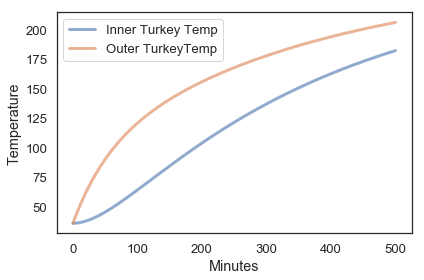

In [99]:
plot_results(results.T_inner, results.T_outer)

In [110]:
def sweep_temp(system, slope_func, min_temp, max_temp):
    '''Sweep oven temperature
    
    min_temp: lowest temperature 
    max_temp: highest temperature
    
    Returns: Sweepseries
    '''
    
    temp_array = linspace(min_temp, max_temp, 3)
    sweep = SweepSeries()
    
    for temp in temp_array:
        results, details = run_ode_solver(system,slope_func,max_step=1)
        plot_results(results.T_inner, results.T_outer)
        #sweep[temp] = results
    
    
    

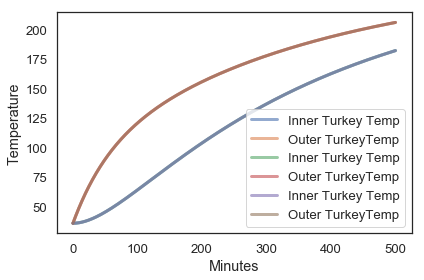

In [111]:
sweep_temp(system, slope_func, 350, 400)